Gaussian Mixture Models (GMM) provide a probabilistic approach to clustering, allowing for soft assignments rather than rigid labels. Unlike K-Means, which forces each data point into a single cluster, GMM determines the probability that each data point belongs to multiple clusters, making it an effective method for detecting anomalies that do not fit well into any learned distribution.

In this lesson, you will apply GMM to identify patterns and anomalies in a dataset. The process follows a structured problem-solving approach:

1. Exploratory Data Analysis (EDA): Visualize raw data to assess natural groupings before clustering.
2. Data Preprocessing: Standardize features to ensure equal contribution to clustering.
3. Selecting the Optimal Number of Components (K): Use Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC) to determine the best number of clusters.
4. Expectation-Maximization (E-M) Algorithm: Train a GaussianMixture model to assign probabilities to data points.
5. Anomaly Detection: Identify points with low cluster probability scores, indicating potential anomalies.
6. Visualization & Interpretation: Plot the clusters, highlight anomalies, and analyze results.

**Key Steps to Address Challenges**

- Choosing the Right Number of Clusters (K): A critical decision, addressed using BIC/AIC instead of arbitrary selection.
- Identifying Anomalies: Instead of predefined thresholds, anomalies are detected based on probability scores, ensuring a data-driven approach.
- Interpreting GMM Results: Unlike K-Means, GMM allows for elliptical cluster shapes with varying covariances, improving model flexibility.

##### Step 1: Load Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

c:\Users\marha\.conda\envs\ml\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


##### Step 2: Generate the Dataset and Perform EDA

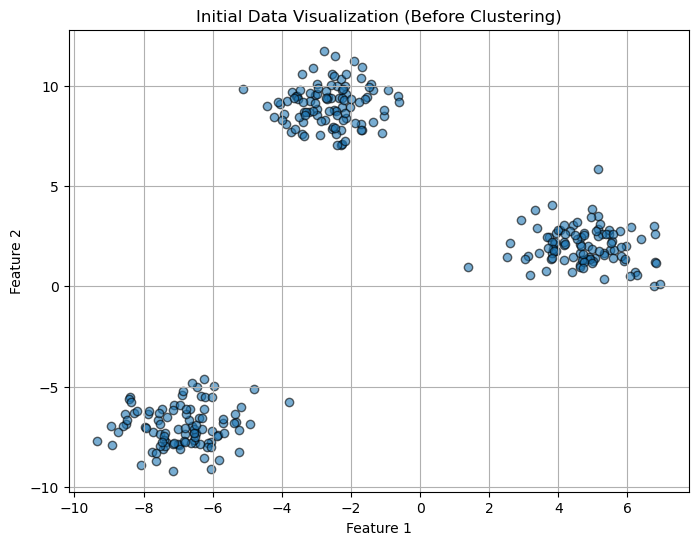

In [2]:
# If using real-world data, load the dataset with pd.read_csv().
# If using synthetic data, generate a dataset with make_blobs().
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Convert to DataFrame
data = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

# Initial EDA: Scatter plot of raw data
plt.figure(figsize=(8, 6))
plt.scatter(data['Feature_1'], data['Feature_2'], alpha=0.6, edgecolors='k')
plt.title('Initial Data Visualization (Before Clustering)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

##### Step 3: Preprocess the Data

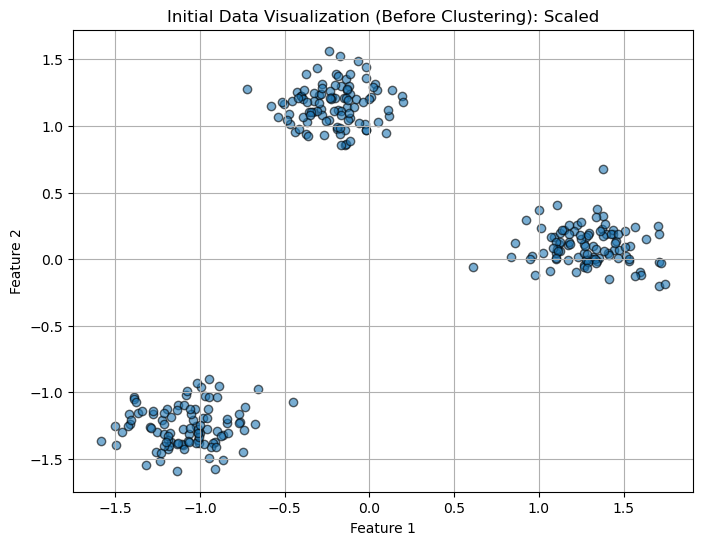

In [3]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Initial EDA: Scatter plot of scaled data
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], alpha=0.6, edgecolors='k') # Access columns by index
plt.title('Initial Data Visualization (Before Clustering): Scaled')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

##### Step 4: Select the Number of Components (Clusters, K)

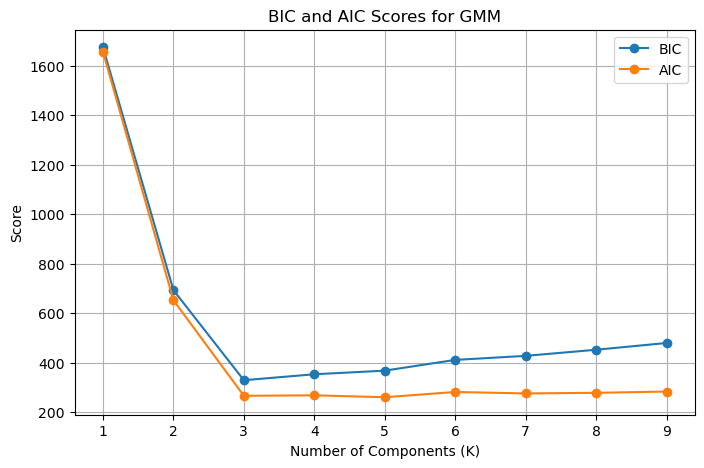

In [4]:
# Use the Elbow Method or BIC/AIC to determine an optimal K.
# Default to K=3 or K=4 if exploratory analysis is not required.
bic_scores = []
aic_scores = []
k_values = range(1, 10)

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42, n_init=10)
    gmm.fit(data_scaled)
    bic_scores.append(gmm.bic(data_scaled))
    aic_scores.append(gmm.aic(data_scaled))

# Plot BIC and AIC to find optimal K
plt.figure(figsize=(8, 5))
plt.plot(k_values, bic_scores, marker='o', linestyle='-', label='BIC')
plt.plot(k_values, aic_scores, marker='o', linestyle='-', label='AIC')
plt.xlabel('Number of Components (K)')
plt.ylabel('Score')
plt.legend()
plt.title('BIC and AIC Scores for GMM')
plt.grid(True)
plt.show()

##### Step 5: Apply the Expectation-Maximization Algorithm

In [6]:
optimal_k = 3  # from BIC/AIC analysis
gmm = GaussianMixture(n_components=optimal_k, random_state=42, n_init=10)
gmm.fit(data_scaled)

# Predict cluster probabilities
probs = gmm.predict_proba(data_scaled)

# Assign clusters based on max probability
cluster_assignments = gmm.predict(data_scaled)

##### Step 6: Identify Anomalies Using Probability Scores #####

Define anomalies as points with low cluster probability.

Decision Point: Set a probability threshold for anomalies.
- Default threshold: 5th percentile of all probability scores.
- Alternate step: Manually set a threshold (e.g., 0.05 or 0.01).

In [7]:
# Compute minimum probability per point
min_prob = np.min(probs, axis=1)

# Define anomaly threshold (5th percentile)
threshold = np.percentile(min_prob, 5)

# Identify anomalies
anomalies = data[min_prob < threshold]

##### Step 7: Visualize Clusters and Anomalies

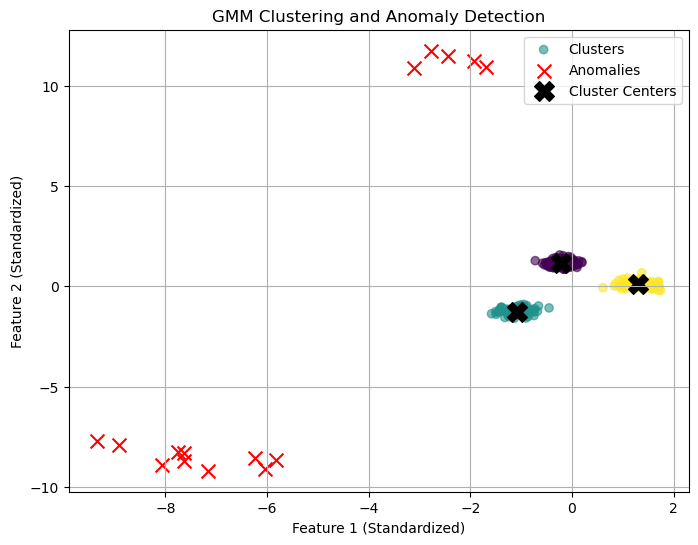

In [8]:
plt.figure(figsize=(8, 6))

# Scatter plot of all data points
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.6, label="Clusters")

# Highlight anomalies
plt.scatter(anomalies['Feature_1'], anomalies['Feature_2'], color='red', marker='x', s=100, label="Anomalies")

# Plot cluster centers
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=200, c='black', marker='X', label="Cluster Centers")

plt.title('GMM Clustering and Anomaly Detection')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.grid(True)
plt.show()

##### Step 8: Interpret the Results #####

- Anomalies represent points with a low probability of belonging to any cluster.
- Clusters may have different shapes due to covariance matrices.
- Refine the model by adjusting K or the probability threshold if necessary.

*Note on the differences of the scatter plots from before and after the GMM Clustering*
The difference in scale ranges between the standardized data plot (with values between -2 and 2) and the GMM clustering and anomaly detection plot (with values between -10 and 10) can be explained by the following factors:

1. Standardization with StandardScaler: StandardScaler()  transforms the data such that:

    - Each feature has a mean of 0.
    - Each feature has a standard deviation of 1.
    - As a result, most data points will lie within ±2 standard deviations from the mean.

2. Effect of GMM Clustering and Anomalies Plot

    - In the GMM clustering visualization, the GaussianMixture model assigns cluster means (gmm.means_) and estimates covariance matrices (gmm.covariances_).
    - The cluster centers and their distributions are calculated based on the standardized dataset, but when plotting, matplotlib automatically scales the axes based on the dataset spread.
    - Covariance matrices introduce variability in the clustering process, and points that fall into different probability distributions may have a wider spread than the initial standardized data.
    - The anomalies, in particular, are likely outliers far from cluster centers, further widening the range of displayed values.

3. Differences in Data Representation

    - The first visualization (standardized data plot) simply plots raw standardized features.
    - The second visualization (GMM clusters & anomalies plot) adds cluster assignments, anomaly markers, and GMM-estimated means, which may slightly adjust the axis scaling for better -visibility.
    - The scatter plot of anomalies may contain low-probability points that are farther from cluster centers, expanding the range.

**Summary**

- Standardized Data Plot (Range: ~ -2 to 2): data is standardized to have mean = 0, std = 1.
- GMM Clustering & Anomalies Plot (Range: ~ -10 to 10): Gaussian mixture components estimate new means and covariances, which can result in a broader display range due to probability-based cluster assignments.